In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [82]:
df = pd.read_csv("/Users/sa2/Desktop/TKH/Music-Recommendation-Algorithm/clean.csv")

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28362 entries, 0 to 28361
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   dating                    28362 non-null  float64
 1   violence                  28362 non-null  float64
 2   world/life                28362 non-null  float64
 3   night/time                28362 non-null  float64
 4   shake the audience        28362 non-null  float64
 5   family/gospel             28362 non-null  float64
 6   romantic                  28362 non-null  float64
 7   communication             28362 non-null  float64
 8   obscene                   28362 non-null  float64
 9   music                     28362 non-null  float64
 10  movement/places           28362 non-null  float64
 11  light/visual perceptions  28362 non-null  float64
 12  family/spiritual          28362 non-null  float64
 13  sadness                   28362 non-null  float64
 14  feelin

## KMeans without Scaling

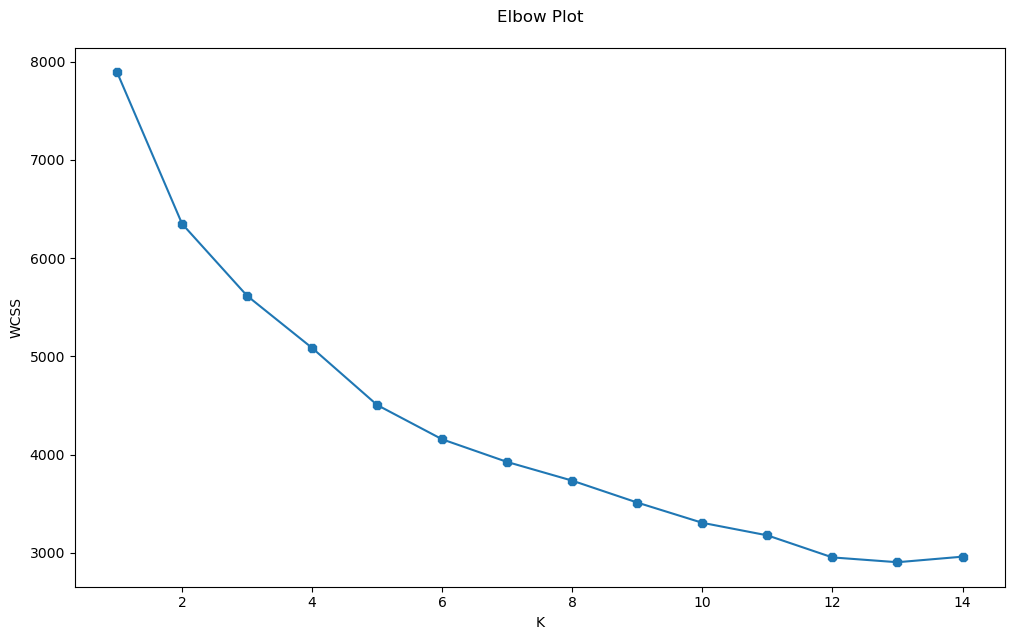

In [84]:

X1 = df.loc[:, ['dating', 'violence', 'world/life', 'night/time', 'shake the audience', 'family/gospel', 'romantic', 'communication', 'obscene', 'music', 'movement/places', 'light/visual perceptions', 'family/spiritual', 'sadness', 'feelings', 'age']].values

wcss= []
for k in range(1, 15):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state=50)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
    

plt.figure(figsize = (12, 7))

plt.plot(range(1, 15), wcss, marker = '8')
plt.title('Elbow Plot\n')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

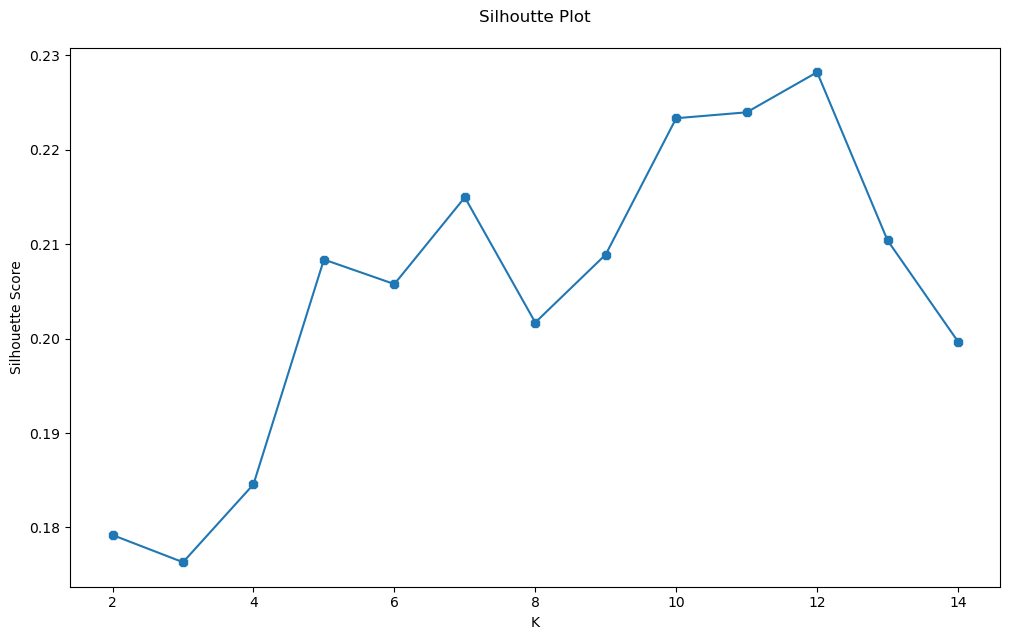

In [85]:
silhouette = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state=50)
    predictions = kmeans.fit_predict(X1)
    silhouette.append(metrics.silhouette_score(X1, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 15), silhouette, marker = '8')
plt.title('Silhoutte Plot\n')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

according to both plots, 12 is the best number of clusters

In [112]:
kmeans =  KMeans(n_clusters= 12, init = "k-means++" , n_init= 50, random_state= 50)
kmeans.fit(X1)

KMeans(n_clusters=12, n_init=50, random_state=50)

In [113]:
labels = kmeans.fit_predict(X1)
labels

array([ 5, 10,  9, ...,  3,  3,  3], dtype=int32)

In [110]:
kmeans.cluster_centers_

array([[0.02094099, 0.03904508, 0.17983928, 0.07008728, 0.01703068,
        0.0150908 , 0.04784303, 0.08340689, 0.01960358, 0.06091157,
        0.04157899, 0.04966255, 0.02299301, 0.20835496, 0.03555462,
        0.24903363],
       [0.01972374, 0.05059474, 0.04234115, 0.03037474, 0.02566745,
        0.01672   , 0.0137269 , 0.06607946, 0.46458049, 0.02304579,
        0.0652617 , 0.02694749, 0.01619699, 0.02448499, 0.02016065,
        0.25814907],
       [0.01265094, 0.43103032, 0.05535468, 0.0361507 , 0.0164764 ,
        0.01554034, 0.02273926, 0.0703765 , 0.02558677, 0.02725717,
        0.04958984, 0.0543696 , 0.0318404 , 0.04907014, 0.02254211,
        0.32957765],
       [0.02659128, 0.04472002, 0.14159194, 0.07023453, 0.01453996,
        0.01974194, 0.07968644, 0.07901561, 0.03832413, 0.09437028,
        0.04322825, 0.05545978, 0.02450806, 0.15249532, 0.03661677,
        0.70838652]])

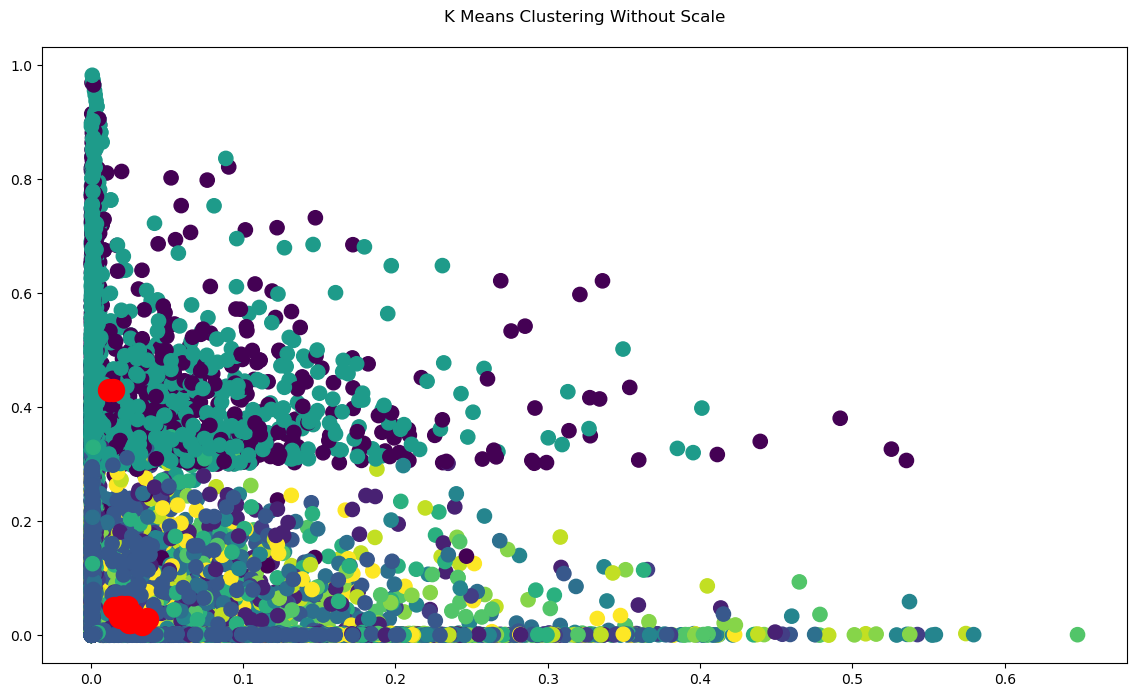

In [114]:
plt.figure(figsize = (14, 8))
plt.scatter(X1[:, 0], X1[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('K Means Clustering Without Scale\n')
plt.xlabel('')
plt.ylabel('')
plt.show()

too many dimensions for this plot to be understood